# Expansión Ortogonal

In [1]:
!pip install sympy

You should consider upgrading via the 'C:\Users\diego\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
import sympy as sp
from sympy.abc import x

In [12]:
x = sp.symbols('x')
# Definir las funciones
f1 = 1
f2 = x
f3 = x**2
f4 = x**3
f5 = x**4
w = 1/(sp.sqrt(1-x**2))

# Funciones Auxiliares

In [13]:
def producto_interno(funcion1, funcion2, w=1):
    return sp.integrate(funcion1 * funcion2 *w , (x, -1, 1))

def norma_funcional(funcion1):
    return sp.sqrt(producto_interno(funcion1,funcion1))

In [14]:
def gram_schmidt(funciones):
    ortonormales = []
    R = []
    for k in range(len(funciones)):
        # L2: y = a_k
        y = funciones[k]
        r_k = []
        # L3: bucle
        for i in range(k):
            # L4: producto punto entre <q_i , y>
            rik = producto_interno(ortonormales[i], y, w=w)
            r_k.append(rik)
            # L5: se resta la proyeccion
            y = y - rik * ortonormales[i]
        
        # L6: Normalización
        rk_k = norma_funcional(y)
        qk = y / rk_k
        
        ortonormales.append(qk)
        r_k.append(rk_k)
        R.append(r_k)
    return ortonormales, R



funciones = [f1, f2, f3, f4, f5]
funciones_ortonormales, R = gram_schmidt(funciones)

print(R)

for i, f in enumerate(funciones_ortonormales):
    print(f"q{i+1}(x) = {f}")

[[sqrt(2)], [0, sqrt(6)/3], [sqrt(2)*pi/4, 0, sqrt(-pi/3 + 2/5 + pi**2/8)], [0, 3*sqrt(6)*pi/16, 0, sqrt(-9*pi/20 + 2/7 + 27*pi**2/128)], [3*sqrt(2)*pi/16, 0, (-3*pi**2/32 + 5*pi/32 + 3*pi**3/128)/sqrt(-pi/3 + 2/5 + pi**2/8) - (-3*pi**3/128 - 5*pi/32 + 3*pi**2/32)/sqrt(-pi/3 + 2/5 + pi**2/8), 0, sqrt(2*(-45*pi**3 - 300*pi + 180*pi**2)/(-1120*pi + 1344 + 420*pi**2) + 2*(-28800*pi**5 - 71280*pi**3 - 675*pi**7 + 28800*pi**2 + 63720*pi**4 + 6750*pi**6)/(-153600*pi**3 - 491520*pi + 294912 + 28800*pi**4 + 389120*pi**2) + 2*(-317520*pi**5 - 24300*pi**7 - 311040*pi**3 + 82944*pi**2 + 2025*pi**8 + 447120*pi**4 + 121500*pi**6)/(-1228800*pi**3 - 3932160*pi + 2359296 + 230400*pi**4 + 3112960*pi**2) + 2/9 + 2*(-39600*pi**5 - 263520*pi**3 - 55296*pi + 239760*pi**2 + 4725*pi**6 + 143640*pi**4)/(-384000*pi**3 - 1228800*pi + 737280 + 72000*pi**4 + 972800*pi**2))]]
q1(x) = sqrt(2)/2
q2(x) = sqrt(6)*x/2
q3(x) = (x**2 - pi/4)/sqrt(-pi/3 + 2/5 + pi**2/8)
q4(x) = (x**3 - 9*pi*x/16)/sqrt(-9*pi/20 + 2/7 + 27*

# TODO: Gráficar

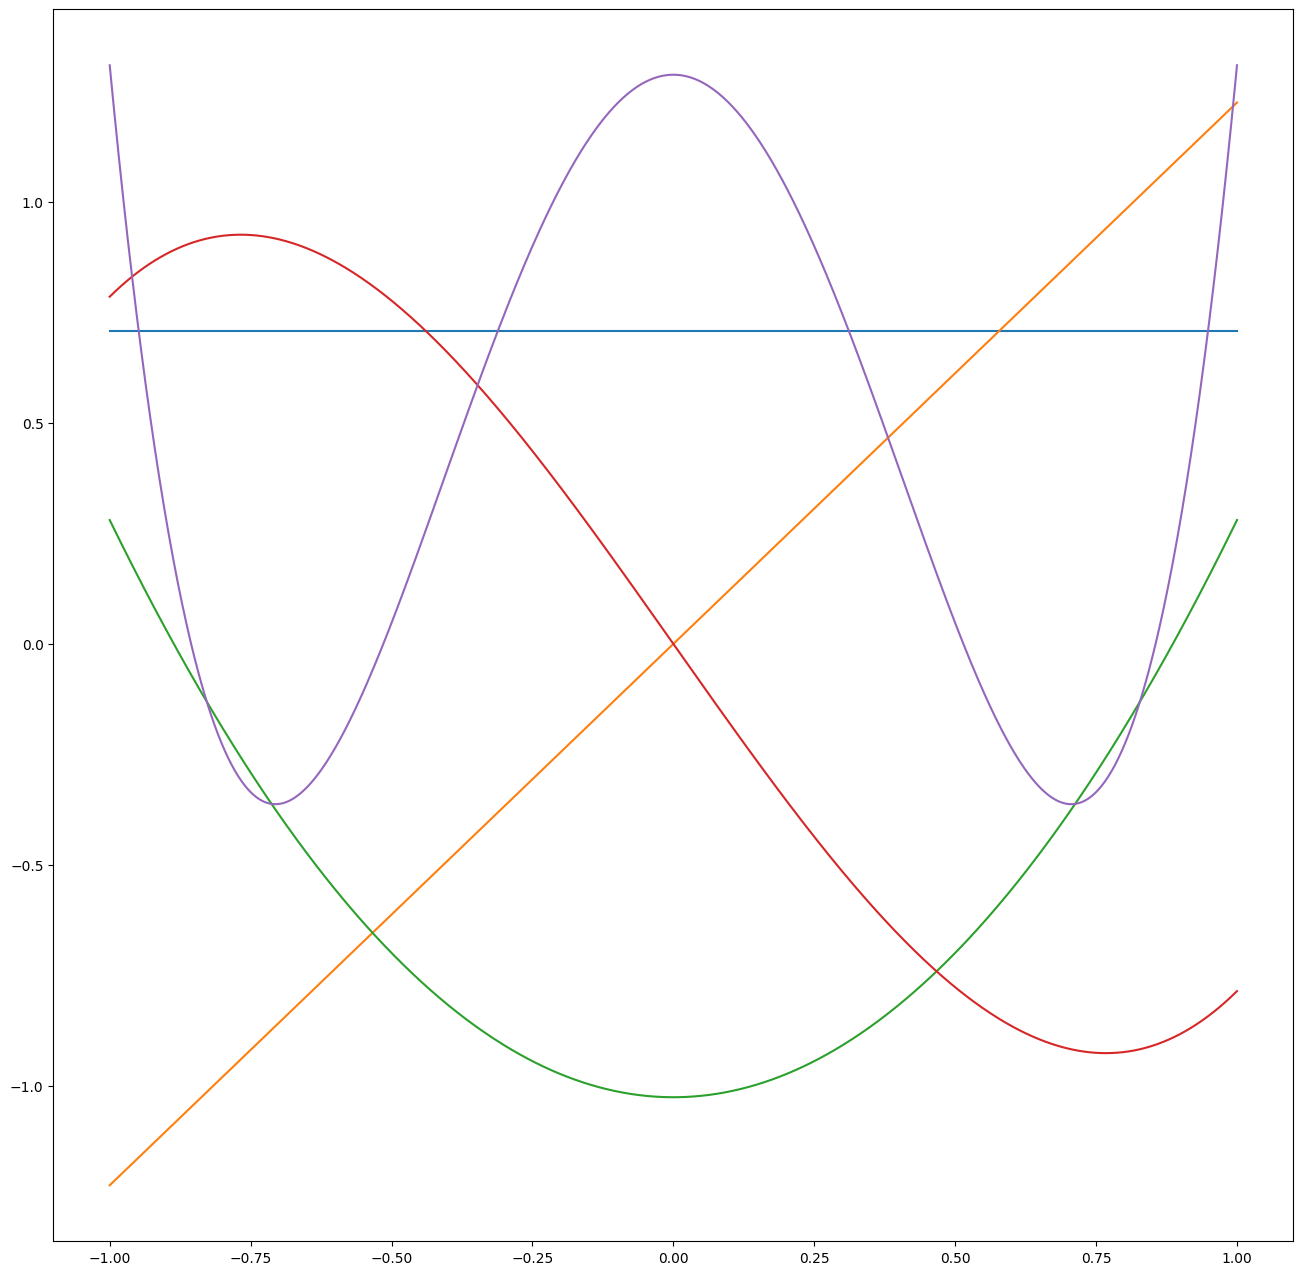

In [15]:
import matplotlib.pyplot as plt
import numpy as np

n = 1000
puntos = np.linspace(-1,1,n)


plt.figure(figsize=(16,16))
for i, f in enumerate(funciones_ortonormales):
    f_vec = np.vectorize(sp.lambdify(x, f))
    plt.plot(puntos,f_vec(puntos),"-")




sqrt(2)/2
sqrt(6)*x/2
(x**2 - pi/4)/sqrt(-pi/3 + 2/5 + pi**2/8)
(x**3 - 9*pi*x/16)/sqrt(-9*pi/20 + 2/7 + 27*pi**2/128)
(x**4 - (x**2 - pi/4)*((-3*pi**2/32 + 5*pi/32 + 3*pi**3/128)/sqrt(-pi/3 + 2/5 + pi**2/8) - (-3*pi**3/128 - 5*pi/32 + 3*pi**2/32)/sqrt(-pi/3 + 2/5 + pi**2/8))/sqrt(-pi/3 + 2/5 + pi**2/8) - 3*pi/16)/sqrt(2*(-45*pi**3 - 300*pi + 180*pi**2)/(-1120*pi + 1344 + 420*pi**2) + 2*(-28800*pi**5 - 71280*pi**3 - 675*pi**7 + 28800*pi**2 + 63720*pi**4 + 6750*pi**6)/(-153600*pi**3 - 491520*pi + 294912 + 28800*pi**4 + 389120*pi**2) + 2*(-317520*pi**5 - 24300*pi**7 - 311040*pi**3 + 82944*pi**2 + 2025*pi**8 + 447120*pi**4 + 121500*pi**6)/(-1228800*pi**3 - 3932160*pi + 2359296 + 230400*pi**4 + 3112960*pi**2) + 2/9 + 2*(-39600*pi**5 - 263520*pi**3 - 55296*pi + 239760*pi**2 + 4725*pi**6 + 143640*pi**4)/(-384000*pi**3 - 1228800*pi + 737280 + 72000*pi**4 + 972800*pi**2))


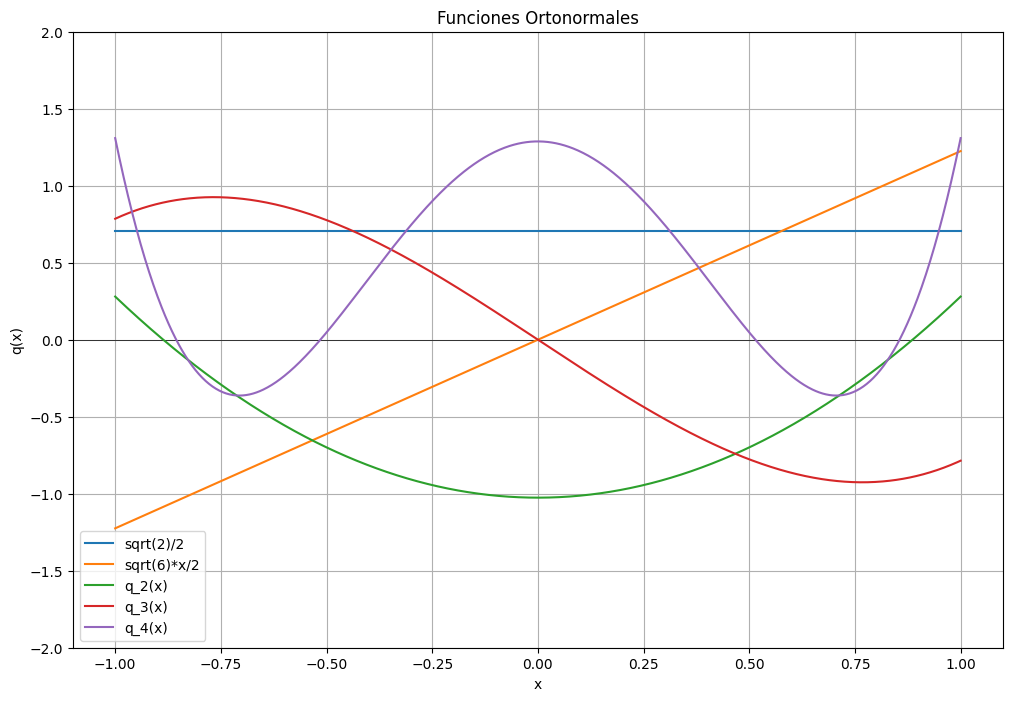

In [38]:
n = 1000
puntos = np.linspace(-1,1, n)


plt.figure(figsize=(12, 8))
plt.title("Funciones Ortonormales")
plt.xlabel("x")
plt.ylabel("q(x)")
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)


for i, f_symbolic in enumerate(funciones_ortonormales):
    
    f_numeric = sp.lambdify(x, f_symbolic, 'numpy')
    
   
    y_valores = f_numeric(puntos) * np.ones_like(puntos)
    
    string = str(f_symbolic)
    print(string)# if len(string) < 25 else f"q_{i}(x)")
    plt.plot(puntos, y_valores, label= string if len(string) < 25 else f"q_{i}(x)")

plt.legend()
plt.ylim(-2, 2)
plt.show()